<a href="https://colab.research.google.com/github/amejiyo/FRA503_Rescource/blob/main/Knn-heirachy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Homework 4: Unsupervised Learning**
1. Pakapak Silpapinun ID:62340500042
2. Supana Somtuy ID:62340500055

In [ ]:
import numpy as np
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn import metrics, preprocessing
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import plotly
import plotly.express as px
import seaborn as sns
import scipy.cluster.hierarchy as shc

Regarding to the company's strategy, the investment will mainly focus on countries which struggling for aid. The given information are

1. country
2. child_mort = death of under-5-year-old children per 1000 births
3. exports =  export goods and services given as %age of GDP per capital
4. health = total health spending per capital
5. imports = import goods and services given as %age of GDP per capital
6. income = net income per person
7. inflation = annual growth rate of GDP
8. life_expec = expect living child birth (in case of current motality patterns are the same) 
9. total_fer = possible child birth in each woman if the current age-fertility rates remain the same.
10. gdpp = GDP per capital

It is common to state that ,the country in the direst need of aid will have high value in (2), (8) and (9) and have low value in (3), (4), (6), (7), and (10).

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/amejiyo/FRA503_Rescource/main/Country-data.csv")

In [ ]:
# Some data Stats
df.info() # information
df.describe() # Summary Stastics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

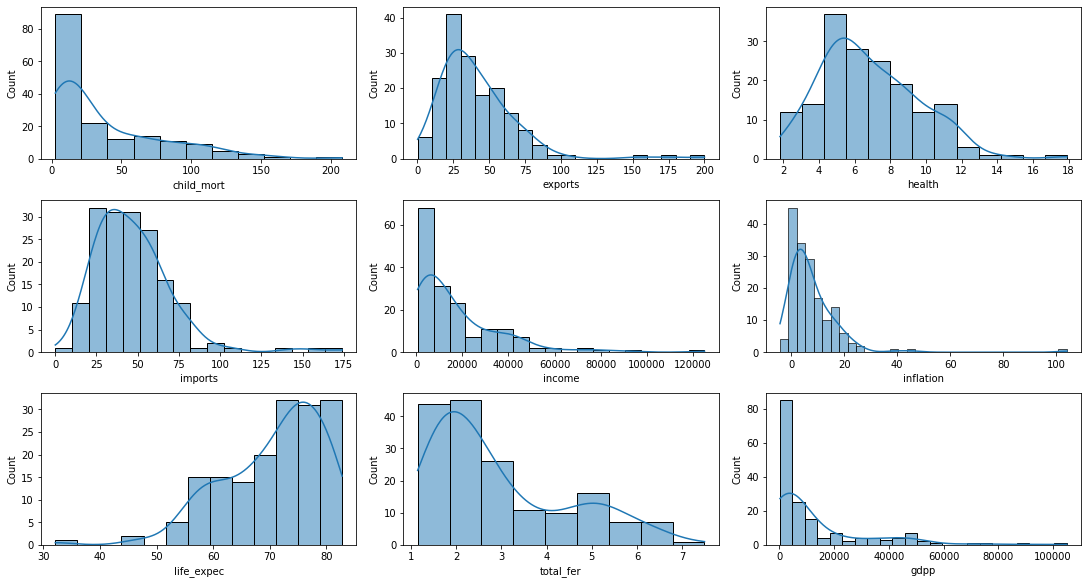

In [ ]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,8), constrained_layout=True)
ax=ax.flatten()
for ind,i in enumerate(df.iloc[:,1:].columns):
    sns.histplot(df[i],ax=ax[ind],kde=True)

The data is given in 3 types: float, int, and object. Its shape is 167x10 (167 rows of data, and 10 columns of features). All data is known. For the distribution in each feature, all of them are different and has its own scale in both x and y axis. Therefore, in data prepocessing, we will use standard scaler from sklearn to re-scale and make them result in the same trend.

In [ ]:
# scaling
x = df.iloc[:,1:].values # returns a numpy array
StandardScaler = preprocessing.StandardScaler
df_scaled = StandardScaler().fit_transform(df.drop(['country'], axis=1))
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [ ]:
# find correlation matrix
corrMat = df_scaled.corr()
corrMat.style.background_gradient(cmap='coolwarm').set_precision(2)

,0,1,2,3,4,5,6,7,8
0,1.00,-0.32,-0.20,-0.13,-0.52,0.29,-0.89,0.85,-0.48
1,-0.32,1.00,-0.11,0.74,0.52,-0.11,0.32,-0.32,0.42
2,-0.20,-0.11,1.00,0.10,0.13,-0.26,0.21,-0.20,0.35
3,-0.13,0.74,0.10,1.00,0.12,-0.25,0.05,-0.16,0.12
4,-0.52,0.52,0.13,0.12,1.00,-0.15,0.61,-0.50,0.90
5,0.29,-0.11,-0.26,-0.25,-0.15,1.00,-0.24,0.32,-0.22
6,-0.89,0.32,0.21,0.05,0.61,-0.24,1.00,-0.76,0.60
7,0.85,-0.32,-0.20,-0.16,-0.50,0.32,-0.76,1.00,-0.45
8,-0.48,0.42,0.35,0.12,0.90,-0.22,0.60,-0.45,1.00


From the correlation matrix, feature (9) has the strong direct variation to (2), likewise in feature (6) and (10). Therefore, instead of using 9 attributes. We can use only 7 with the reason of some features can be describe in another feature.

In [ ]:
df_select = df_scaled.copy().iloc[:,:7]

**KMeans**

After we preprocess the data, the model parameter, k, is identifying. For the k parameter selection, we will select k which locates in between great change and small change.

In [ ]:
Num_K = [i+1 for i in range(10)]
WCSS = []

for k in Num_K:
  kmeans = KMeans(n_clusters=k, random_state=1,)
  model_knn = kmeans.fit(df_select)
  WCSS.append(model_knn.inertia_)

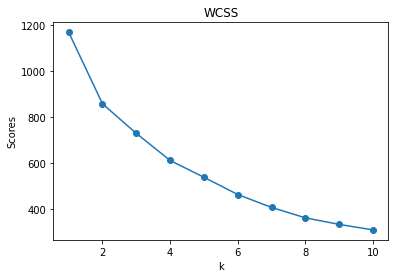

In [ ]:
plt.scatter(Num_K,WCSS )
plt.plot(Num_K,WCSS )
plt.title('WCSS')
plt.ylabel('Scores')
plt.xlabel('k')
plt.show()

The k in between the drastic change and small change is k =4. Therefore, we use k=3 in kmeans model.

In [ ]:
k_mean_model = KMeans(n_clusters=4,random_state=1)
result = k_mean_model.fit(df_select)

In [ ]:
df_kmean = df.copy()
df_kmean['label1'] = k_mean_model.labels_

In [ ]:
df_kmean[df_kmean.label1==0].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label1
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,0


In [ ]:
df_kmean[df_kmean.label1==1].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label1
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,43.6,8.30,51.3,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,1


In [ ]:
df_kmean[df_kmean.label1==2].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,2
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,2


In [ ]:
df_kmean[df_kmean.label1==3].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label1
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,3
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,3
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,3


In [ ]:
df_kmean.label1.value_counts()

2    84
1    49
0    31
3     3
Name: label1, dtype: int64

From our predicted data, 0 refers to 'No Help needed'. 1 refers to 'Struggling'. 2 refers to 'Might need help'. Finally, 3 refers to 'Don't need help'.To visualize the result, we color the world map by the label value.

In [ ]:
cat = {0:'No Help needed',1:'Struggling',2:'Might need help', 3:'Don\'t need help'}
df_plot = df_kmean.copy()
fig = px.choropleth(data_frame=df, locationmode='country names', locations='country', color=df_plot['label1'], color_continuous_scale=px.colors.sequential.Viridis,title='Investment Strategy',projection='equirectangular')
fig.show()
df_plot['label1']=df_plot['label1'].map(cat)

**Hierachy Clustering**

To select the number cluster, the dendrogram is used. Based on our lesson in class, we will use complete method.

In [ ]:
df_select

,0,1,2,3,4,5,6
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258
...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633


After we observed serveral methods of Hierachy Clustering, we decided to use complete method: the maximum distance.

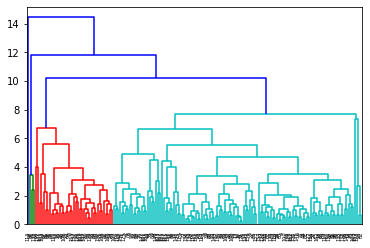

In [ ]:
dend_max = shc.dendrogram(shc.linkage(df_select, method='complete'))

From the graph, we will use number of cluster equals to 4 and cluster with cosine similarity.

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='cosine', linkage='complete').fit(df_select)
df_hier = df.copy()
df_hier['label'] = cluster.labels_

In [ ]:
df_hier[df_hier.label==0].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0


In [ ]:
df_hier[df_hier.label==1].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,43.6,8.30,51.3,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,1


In [ ]:
df_hier[df_hier.label==2].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.44,76.0,2.16,20700,2
14,Belarus,5.5,51.4,5.61,64.5,16200,15.10,70.4,1.49,6030,2
16,Belize,18.8,58.2,5.20,57.5,7880,1.14,71.4,2.71,4340,2
18,Bhutan,42.7,42.5,5.20,70.7,6420,5.99,72.1,2.38,2180,2
23,Brunei,10.5,67.4,2.84,28.0,80600,16.70,77.1,1.84,35300,2


In [ ]:
df_hier[df_hier.label==3].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,3
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5840,3
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.14,70.4,2.33,758,3
19,Bolivia,46.6,41.2,4.84,34.3,5410,8.78,71.6,3.20,1980,3


In [ ]:
df_hier.label.value_counts()

0    67
1    44
2    29
3    27
Name: label, dtype: int64

From the predicted data, 0 refers to 'No Help needed'. 1 refers to 'Struggling'. 2 refers to 'Might need help'. Finally, 3 refers to 'Can help'.To visualize the result, we color the world map by the label value.

In [ ]:
cat = {1:'Struggling',2:'Might need Help',3:'Can Help',0:'No help needed'}
df_plot['label2'] = df_hier.label

fig = px.choropleth(data_frame=df, locationmode='country names', locations='country', color=df_plot['label2'], color_continuous_scale=px.colors.sequential.Viridis,title='Investment Strategy',projection='equirectangular')
fig.show()
df_plot['label2']=df_plot['label2'].map(cat)

Comparing the result between KMeans Clustering and Hierachy Clustering

In [ ]:
a = df_plot[df_plot.label1=='Struggling'].country.values
b = df_plot[df_plot.label2=='Struggling'].country.values
pd.set_option("display.max_rows", None, "display.max_columns", None)
same =df_plot.loc[df.country.isin(np.intersect1d(a,b))]
same.shape

(39, 12)

In [ ]:
diff = df_plot.loc[df.country.isin(np.append((np.setdiff1d(a,b)),np.setdiff1d(b,a)))]
print(diff.shape)
diff

(15, 12)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label1,label2
27,Cambodia,44.4,54.100,5.68,59.5000,2520,3.12,66.1,2.88,786,Might need help,Struggling
50,Eritrea,55.2,4.790,2.66,23.3000,1420,11.60,61.7,4.61,482,Struggling,Can Help
52,Fiji,24.1,57.800,4.86,63.9000,7350,4.23,65.3,2.67,3650,Might need help,Struggling
55,Gabon,63.7,57.700,3.50,18.9000,15400,16.60,62.9,4.08,8750,Struggling,Can Help
69,India,58.8,22.600,4.05,27.1000,4410,8.98,66.2,2.60,1350,Struggling,Can Help
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988,Struggling,Can Help
109,Nepal,47.0,9.580,5.25,36.4000,1990,15.10,68.3,2.61,592,Struggling,Can Help
113,Nigeria,130.0,25.300,5.07,17.4000,5150,104.00,60.5,5.84,2330,Struggling,Can Help
116,Pakistan,92.1,13.500,2.20,19.4000,4280,10.90,65.3,3.85,1040,Struggling,Can Help
136,Solomon Islands,28.1,49.300,8.55,81.2000,1780,6.81,61.7,4.24,1290,Might need help,Struggling


According to predicted results, Kmeans Clustering predicts that there is 49 countries needed help, while Hierachy Clustering predicts that there is 44 countries neede help. Regarding to what we stated about the criteria of  determining the country which struggling for help, we observe the difference from dataframe 'diff' to identify the suitable model. As the result, the Kmeans Clustering seems to have more accurate prediction than Heirachy Clustering by matching with our criteria more than Heirachy Clustering.

To give the reason, we think that Kmeans Clustering performs better because it is an easy-to-use model. The only one thing we need to do is find a suitable K. Unlike Hierachy Clustering, we need to select the suitable method, number of cluster, and affinity. Therefore, we think that our Hierachy Clustering performs poorly by our inexperience use.
